In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
df = pd.read_csv('/content/marketing_campaign.csv', sep="\t")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.drop(['MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','NumWebVisitsMonth',
       'MntGoldProds', 'NumDealsPurchases','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1, inplace=True)

In [7]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6


In [8]:
df.shape

(2240, 13)

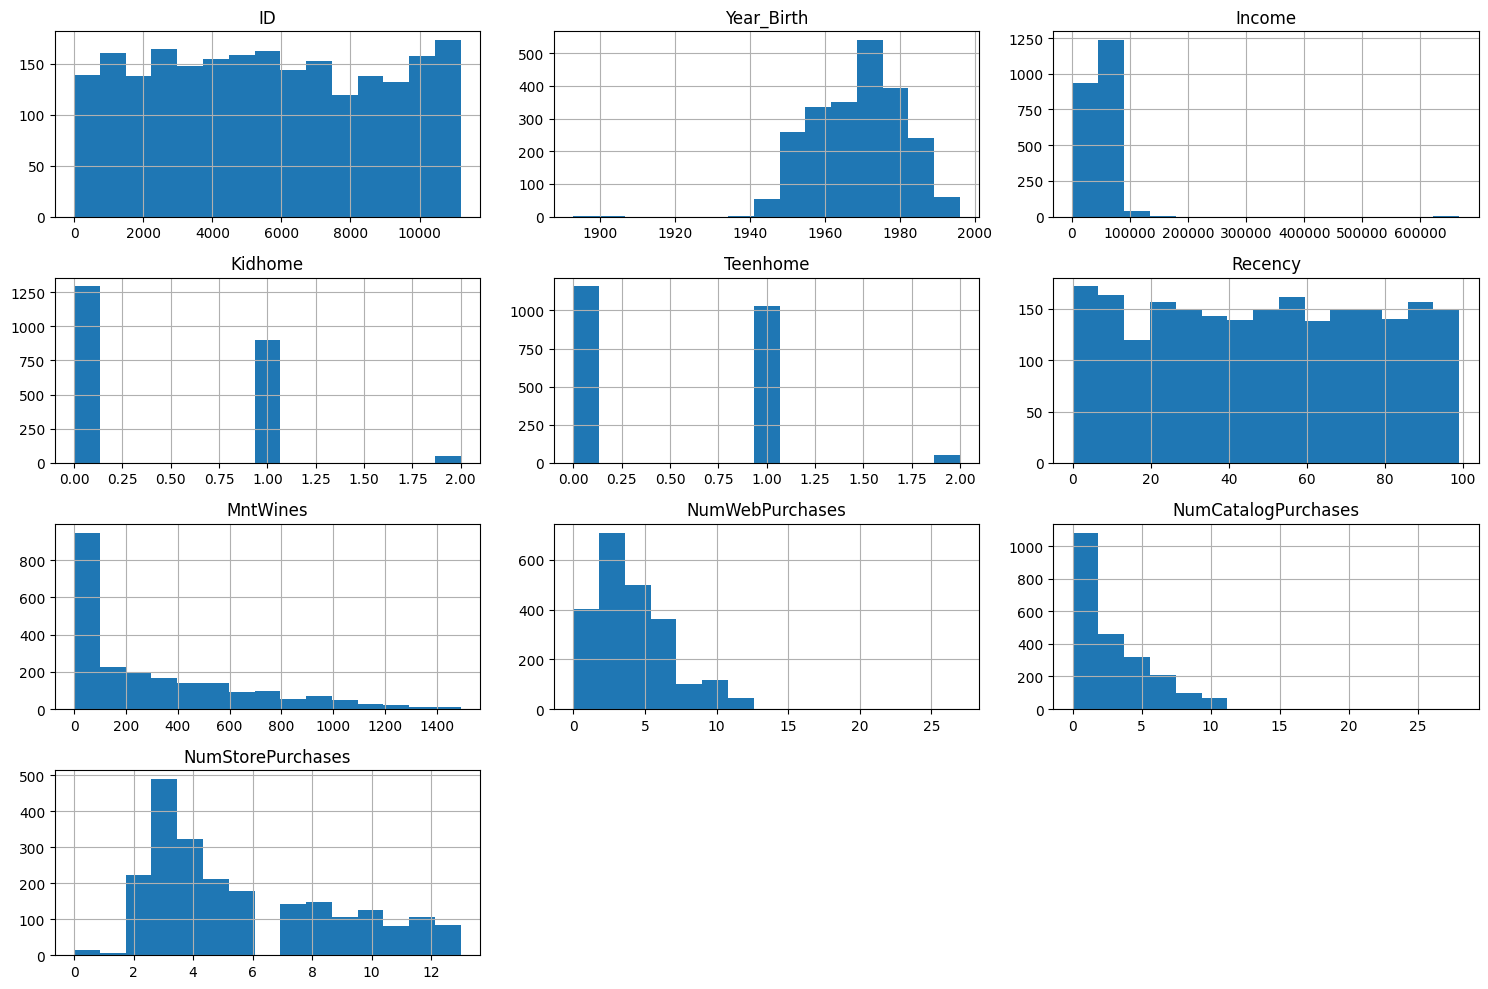

In [9]:
# Dibujar los histogramas de cada una de las columnas, hacerlo con 15 bins
df.hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

In [10]:
# Eliminad las filas que tengan un Income de 666665.0
df = df[df['Income'] != 666665.0]

In [11]:
# Comprobad si no hay ninguna fila
df[df['Income'] == 666665.0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases


## Convertimos el año de nacimiento a categorías de 25 años

In [12]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

## Convertimos la columna Year a bloques de 25 en 25

## Aquí tenéis dos formas, se crea una columna Year_cat

In [13]:
# convertir la columna "año" a tipo numérico
#df['Year_Birth'] = pd.to_numeric(df['Year_Birth'], errors='coerce')

# obtener el rango de años
min_year = df['Year_Birth'].min()
max_year = df['Year_Birth'].max()

# establecer los límites del rango de años para cada categoría
year_range = (max_year - min_year) / 3
cat1_max = min_year + year_range
cat2_max = min_year + year_range*2

# obtener los límites del rango de años de 25 años
year_range = 25
num_ranges = int(np.ceil((max_year - min_year) / year_range))
prop_range = np.linspace(min_year, min_year + year_range * num_ranges, num=num_ranges+1)

# reemplazar cada año con su rango de 25 años
df['Year_cat'] = pd.cut(df['Year_Birth'], bins=prop_range, labels=[f"{int(prop_range[i])}-{int(prop_range[i+1])-1}" for i in range(len(prop_range)-1)])

# imprimir los resultados
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4,1943-1967
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2,1943-1967
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10,1943-1967
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4,1968-1992
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6,1968-1992


In [ ]:
# # Encuentra el año mínimo y máximo en la columna 'Year_Birth'
# min_year = df['Year_Birth'].min()
# max_year = df['Year_Birth'].max()

# # Calcula los intervalos
# intervalo_anios = 25
# num_intervalos = (max_year - min_year) // intervalo_anios + 1
# intervalos = [(min_year + i * intervalo_anios, min_year + (i+1) * intervalo_anios - 1) for i in range(num_intervalos)]

# # Define la función para asignar el intervalo de edad
# def asignar_intervalo_edad(year):
#     for inicio, fin in intervalos:
#         if inicio <= year <= fin:
#             return f"{inicio}-{fin}"
#     return "Fuera de rango"

# # Aplica la función a la columna 'Year_Birth' para crear la nueva columna 'Intervalo_Edad'
# df['Year_cat'] = df['Year_Birth'].apply(asignar_intervalo_edad)

# # Muestra el DataFrame resultante
# print(df.head())

In [14]:
# Contar el  número de muestras de cada opción de Year_cat
df['Year_cat'].value_counts()

Year_cat
1968-1992    1225
1943-1967     993
1993-2017      10
1918-1942       9
1893-1917       2
Name: count, dtype: int64

In [15]:
df.dtypes

ID                        int64
Year_Birth                int64
Education                object
Marital_Status           object
Income                  float64
Kidhome                   int64
Teenhome                  int64
Dt_Customer              object
Recency                   int64
MntWines                  int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
Year_cat               category
dtype: object

In [16]:
# Eliminamos ID, Year_Birth, Dt_Customer

X = df.drop(['ID', 'Year_Birth', 'Dt_Customer'], axis=1)

In [17]:
X.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat
0,Graduation,Single,58138.0,0,0,58,635,8,10,4,1943-1967
1,Graduation,Single,46344.0,1,1,38,11,1,1,2,1943-1967
2,Graduation,Together,71613.0,0,0,26,426,8,2,10,1943-1967
3,Graduation,Together,26646.0,1,0,26,11,2,0,4,1968-1992
4,PhD,Married,58293.0,1,0,94,173,5,3,6,1968-1992


In [18]:
X.Year_cat = X.Year_cat.astype('object')

In [19]:
X.dtypes

Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines                 int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
Year_cat                object
dtype: object

In [20]:
# Chequea si existen valores null
X.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
Year_cat                1
dtype: int64

In [21]:
# identificar los índices de las filas con valores NaN


# eliminar las filas con valores NaN
X = X.dropna()
df = df.dropna()

In [22]:
# Volver a chequear
X.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Year_cat               0
dtype: int64

In [23]:
df.shape

(2215, 14)

In [24]:
X.shape

(2215, 11)

In [25]:
# Crear dos dataframes, uno con columnas numéricas y otro de object

X_num = X.select_dtypes(include=[np.number])
X_cat = X.select_dtypes(include=[object])

In [26]:
X_num.head()

,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,58138.0,0,0,58,635,8,10,4
1,46344.0,1,1,38,11,1,1,2
2,71613.0,0,0,26,426,8,2,10
3,26646.0,1,0,26,11,2,0,4
4,58293.0,1,0,94,173,5,3,6


In [27]:
X_cat.head()

,Education,Marital_Status,Year_cat
0,Graduation,Single,1943-1967
1,Graduation,Single,1943-1967
2,Graduation,Together,1943-1967
3,Graduation,Together,1968-1992
4,PhD,Married,1968-1992


## Fin limpieza --> Encoding y Escalado

In [28]:
# Codificar las variables categóricas a enteros

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_cat2 = X_cat.apply(le.fit_transform)
X_cat2.head()

,Education,Marital_Status,Year_cat
0,2,4,2
1,2,4,2
2,2,5,2
3,2,5,3
4,4,3,3


In [29]:
# estandarizar los datos numéricos a media 0 y desviación 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

In [30]:
X_scaled

array([[ 0.23415744, -0.823351  , -0.92852552, ...,  1.42813148,
         2.50420601, -0.55471702],
       [-0.2343695 ,  1.03949115,  0.90944054, ..., -1.12645765,
        -0.57147305, -1.17014312],
       [ 0.76946357, -0.823351  , -0.92852552, ...,  1.42813148,
        -0.22973093,  1.29156127],
       ...,
       [ 0.18819461, -0.823351  , -0.92852552, ..., -0.76151635,
         0.11201119,  2.21470041],
       [ 0.67539271, -0.823351  ,  0.90944054, ...,  0.69824887,
         0.79549542,  1.29156127],
       [ 0.02484182,  1.03949115,  0.90944054, ..., -0.39657504,
        -0.57147305, -0.55471702]])

In [31]:
X_scaled2 = pd.DataFrame(data= X_scaled, columns = X_num.columns)

In [32]:
# resetear los índices de ambos DataFrames
X_scaled2 = X_scaled2.reset_index(drop=True)
X_cat2 = X_cat2.reset_index(drop=True)

In [33]:
# unir los datos codificados
X_both = pd.concat([X_scaled2, X_cat2], axis=1)
X_final = pd.DataFrame(X_both, columns = X.columns)
# establecer el índice en la columna adecuada
#X_final = X_final.set_index('Index')

In [34]:
X_final.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat
0,2,4,0.234157,-0.823351,-0.928526,0.310113,0.977779,1.428131,2.504206,-0.554717,2
1,2,4,-0.234370,1.039491,0.909441,-0.380899,-0.872378,-1.126458,-0.571473,-1.170143,2
2,2,5,0.769464,-0.823351,-0.928526,-0.795506,0.358095,1.428131,-0.229731,1.291561,2
3,2,5,-1.016890,1.039491,-0.928526,-0.795506,-0.872378,-0.761516,-0.913215,-0.554717,3
4,4,3,0.240315,1.039491,-0.928526,1.553934,-0.392048,0.333308,0.112011,0.060709,3


In [35]:
# Checking Null values
X_final.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
Year_cat               0
dtype: int64

In [36]:
X_final.loc[X_final.isnull().any(axis=1)]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat


# Ya tenemos una matriz categórica y numérica ready para entrenar

## Gaussian Mixture

## Creamos el método de distancia de Gower para calcular bien distancias de datos numéricos y categóricos.

In [37]:
def gower_distance(x, y):
    # Inicializar la distancia
    distance = 0

    # Calcular la distancia de Manhattan para variables numéricas
    for i in range(len(x)):
        if np.issubdtype(type(x[i]), np.number) and np.issubdtype(type(y[i]), np.number):
            distance += abs(x[i] - y[i])
        elif x[i] != y[i]:  # Calcular la distancia de Hamming para variables categóricas
            distance += 1

    return distance

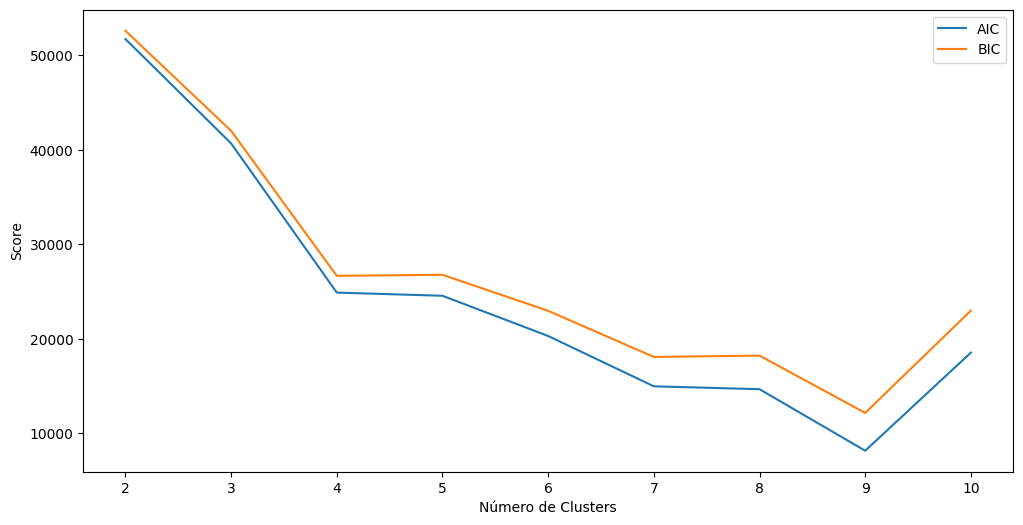

In [38]:
# ajustar el modelo Gaussian Mixture para diferentes valores de k y calcular el AIC y el BIC
n_clusters = range(2, 11)
aic_scores = []
bic_scores = []
for n in n_clusters:
    gm = GaussianMixture(n_components=n, random_state=42)
    gm.fit(X_final)
    aic_scores.append(gm.aic(X_final))
    bic_scores.append(gm.bic(X_final))

# trazar los resultados del AIC y el BIC
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, aic_scores, label='AIC')
plt.plot(n_clusters, bic_scores, label='BIC')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

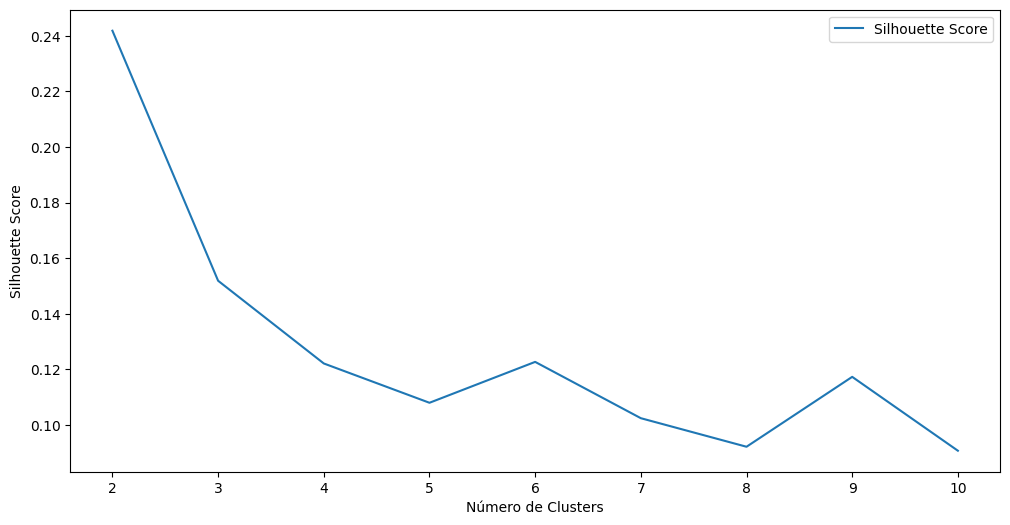

In [39]:
# aplicar el método de la silueta para determinar el número óptimo de clusters
silhouette_scores = []
for n in n_clusters:
    gm = GaussianMixture(n_components=n, random_state=42)
    gm.fit(X_final)
    labels = gm.predict(X_final)
    silhouette_scores.append(silhouette_score(X_final, labels))

# Plotear el silhouette
plt.figure(figsize=(12, 6))
plt.plot(n_clusters, silhouette_scores, label='Silhouette Score')
plt.xlabel('Número de Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

In [41]:
# entrenar el modelo de clustering
n_clusters = 8

# ajustar el modelo Gaussian Mixture con el número óptimo de clusters
gm = GaussianMixture(n_components=n_clusters, random_state=42)
gm.fit(X_final)

# predecir las etiquetas de cluster para los datos
labels = gm.predict(X_final)

In [42]:
# crear un dataframe con las etiquetas de cluster
clusters_df = pd.DataFrame(labels, columns=['Cluster'])

# restablecer los índices de los dataframes
df = df.reset_index(drop=True)
clusters_df = clusters_df.reset_index(drop=True)

# concatenar los dataframes
result = pd.concat([df, clusters_df], axis=1)

In [43]:
result.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4,1943-1967,2
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2,1943-1967,4
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10,1943-1967,2
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4,1968-1992,1
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6,1968-1992,2


In [44]:
result['Cluster'].value_counts()

Cluster
0    632
1    471
4    341
3    298
5    256
2    188
7     28
6      1
Name: count, dtype: int64

In [45]:
# Plotear 2D en el eje horizontal la educación y en el vertical el income, con color de cluster
import plotly.express as px
fig = px.scatter(result, x='Education', y='Income', color='Cluster', title='Clustering Education vs Income')
fig.show()

In [46]:
# Plotear 3D, x education, y income z kidhome
import plotly.express as px
import plotly
fig = px.scatter_3d(result, x='Education', y='Income', z='Kidhome', color='Cluster', title='Clustering 3D Education vs Income vs Kidhome')
fig.show()

In [47]:
# Plotear 3D, x mntwines, y income z kidhome
import plotly.express as px
import plotly
fig = px.scatter_3d(result, x='MntWines', y='Income', z='Kidhome', color='Cluster', title='Clustering 3D MntWines vs Income vs Kidhome')
fig.show()

In [48]:
# Plotear 3D, x mntwines, y Marital_Status z kidhome
import plotly.express as px
import plotly
fig = px.scatter_3d(result, x='MntWines', y='Marital_Status', z='Kidhome', color='Cluster', title='Clustering 3D MntWines vs Marital_Status vs Kidhome')
fig.show()

In [49]:
# Plotear 3D, x mntwines, y Marital_Status z Year_cat

import plotly.express as px
import plotly
fig = px.scatter_3d(result, x='MntWines', y='Marital_Status', z='Year_cat', color='Cluster', title='Clustering 3D MntWines vs Marital_Status vs Year_cat')
fig.show()

## K-PROTOTYPES

In [50]:
!pip install kmodes

In [51]:
from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_samples, silhouette_score

In [52]:
# Crear una lista de objetos kprototypes para diferentes valores de k
costs = []
silhouette_scores = []
for k in range(2, 8):
    kproto = KPrototypes(n_clusters=k, init='Cao', verbose=0, random_state=42)
    clusters = kproto.fit_predict(X_final, categorical=[4, 5, 6])
    costs.append(kproto.cost_)
    silhouette_scores.append(silhouette_score(X_final, clusters, metric=gower_distance))

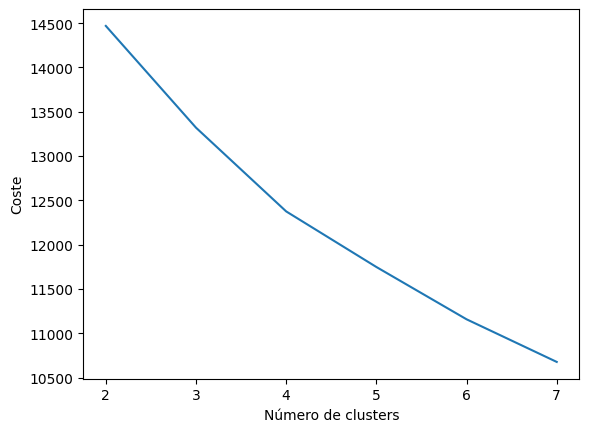

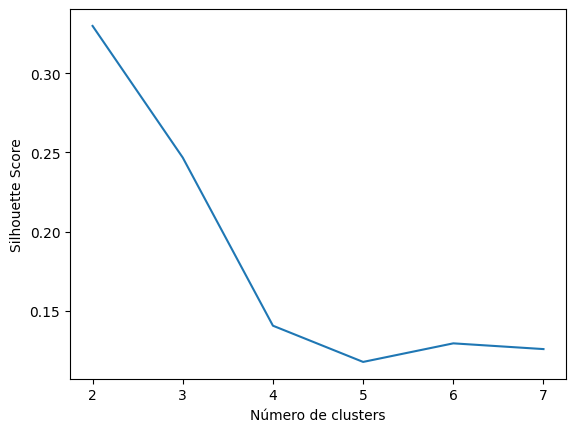

In [53]:
# Plotear la curva del codo (elbow method)
plt.plot(range(2, 8), costs)
plt.xlabel('Número de clusters')
plt.ylabel('Coste')
plt.show()

# Plotear la curva de silhouette score
plt.plot(range(2, 8), silhouette_scores)
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [55]:
# Escoger el número óptimo de clusters según la curva del codo y entrenar el modelo final
kproto_final = KPrototypes(n_clusters=5, init='Cao', verbose=0, random_state=42)
clusters_final = kproto_final.fit_predict(X_final, categorical=[4, 5, 6])

In [56]:
print(kproto.cluster_centroids_)

[[ 2.15457413e+00  3.83280757e+00  1.12522781e+00 -7.70462736e-01
   1.32992781e-01  1.62882872e+00  7.65439905e-01  2.55520505e+00
  -9.28525519e-01 -1.27921386e+00 -3.92142193e-02]
 [ 2.74084507e+00  4.88450704e+00  4.15123338e-01 -6.02958407e-01
   8.85345541e-01  2.81438264e-01  7.55880525e-01  2.35492958e+00
   9.09440544e-01 -1.59016910e+00  6.36804386e-01]
 [ 2.43674699e+00  4.67469880e+00 -6.39772991e-01  1.11804473e+00
  -6.18617645e-01 -7.00141015e-01 -7.82721267e-01  2.71084337e+00
  -9.28525519e-01 -8.42316676e-04 -8.87202470e-01]
 [ 2.53281853e+00  3.59845560e+00 -4.07736892e-01 -8.23350999e-01
  -5.95249654e-01 -5.27930617e-01 -5.61845508e-01  2.40154440e+00
   9.09440544e-01  2.41011759e-01 -8.96097451e-01]
 [ 2.73107050e+00  2.70234987e+00  5.22461686e-01 -6.14206842e-01
   9.17404225e-01  3.85940247e-01  8.11111130e-01  2.42819843e+00
   9.09440544e-01  7.93821074e-01  1.04004355e+00]
 [ 2.51428571e-01  3.70285714e+00 -8.19732053e-01  4.43381662e-01
  -6.44735131e-01 -

In [57]:
clusters_final = pd.DataFrame(clusters_final)
df_proto = pd.concat([df, clusters_final], axis =1)
df_proto = df_proto.rename(columns = {0:"Cluster"})
df_proto.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Year_cat,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,8,10,4,1943-1967,2
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,1,2,1943-1967,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,8,2,10,1943-1967,3
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,2,0,4,1968-1992,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,5,3,6,1968-1992,4


In [58]:
df_proto['Cluster'].value_counts()

Cluster
1    531
0    476
4    446
3    390
2    372
Name: count, dtype: int64

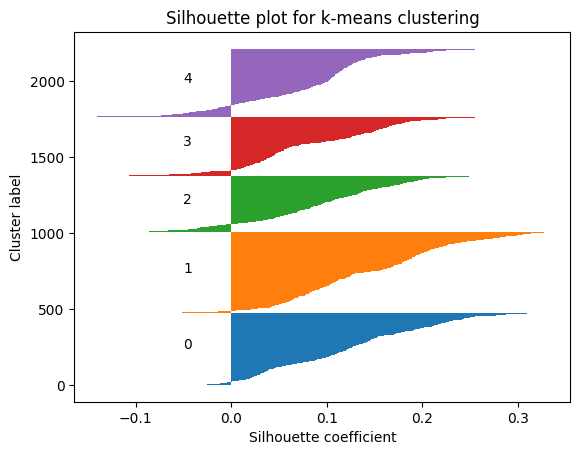

In [59]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Calculate silhouette coefficients for each data point
silhouette_vals = silhouette_samples(X_final, df_proto['Cluster'])

# Plot silhouette plot
y_lower, y_upper = 0, 0
for i in range(kproto_final.n_clusters):
    cluster_silhouette_vals = silhouette_vals[df_proto['Cluster'] == i]
    cluster_silhouette_vals.sort()
    y_upper += len(cluster_silhouette_vals)
    plt.barh(range(y_lower, y_upper), cluster_silhouette_vals, height=1)
    plt.text(-0.05, (y_lower + y_upper) / 2, str(i))
    y_lower += len(cluster_silhouette_vals)

plt.xlabel("Silhouette coefficient")
plt.ylabel("Cluster label")
plt.title("Silhouette plot for k-means clustering")
plt.show()

In [60]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_proto, x='MntWines', y='Income', z='Kidhome', color='Cluster',title="Wine Customers")
fig.show()

## DBSCAN

In [61]:
from sklearn.cluster import DBSCAN

In [62]:
from sklearn.neighbors import NearestNeighbors
# Encontrar las distancias k
k = 8
neighbors = NearestNeighbors() #le pasamos la distancia de Gower que hemos creado
neighbors_fit = neighbors.fit(X_final)
distances, _ = neighbors_fit.kneighbors(X_final)

In [64]:
# Ordenar las distancias
distances = np.sort(distances, axis=0)
distances_mean = np.mean(distances[:,1:], axis=1)

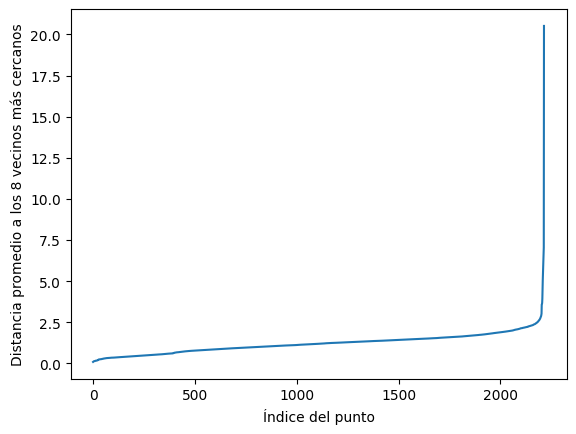

In [65]:
# Graficar las distancias k
plt.plot(distances_mean)
plt.xlabel('Índice del punto')
plt.ylabel(f'Distancia promedio a los {k} vecinos más cercanos')
plt.show()

In [66]:
# Definir el espacio de búsqueda para eps y min_samples
eps_values = np.arange(1, 8, 0.2) # rango e incremento
min_samples_values = np.arange(3, 10, 1) # rango e incremento

# Realizar la búsqueda en malla (grid search)
best_score = -1
best_params = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric='euclidean')
        clusters = dbscan.fit_predict(X_final)

        # Ignorar resultados con solo un cluster o clusters asignados como ruido
        if len(np.unique(clusters)) > 1 and np.any(clusters == -1):
            score = silhouette_score(X_final, clusters)
            if score > best_score:
                best_score = score
                best_params = {'eps': eps, 'min_samples': min_samples}

# Imprimir los mejores valores de eps y min_samples
print(f"Mejores parámetros: {best_params}, Mejor coeficiente de silueta: {best_score}")

Mejores parámetros: {'eps': 6.999999999999998, 'min_samples': 3}, Mejor coeficiente de silueta: 0.8221005991426321


In [67]:
# Aplicar DBSCAN con los mejores parámetros encontrados
dbscan2 = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'], metric='euclidean')
clusters2 = dbscan2.fit_predict(X_final)

In [68]:
cl3=pd.DataFrame(dbscan2.labels_,columns=['Cluster'])

In [69]:
cl3.value_counts()

Cluster
 0         2214
-1            1
Name: count, dtype: int64

In [70]:
df_DB = pd.concat([df,cl3],axis=1)

In [71]:
import plotly.express as px
import plotly
fig = px.scatter_3d(df_DB, x='MntWines', y='Income', z='Kidhome', color='Cluster',title="Wine Customers")
fig.show()